In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "해운대구"
region_code = "18"
target_date = "2017-01-05"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("해운대구2017_1q.csv", index=False, encoding="utf-8-sig")

,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2017-01-05,가루비누,"세탁용세제(LG테크),가루형,3.0kg",7188,해운대구,8925,해운대구,1737,24.17%,"7,846"
1,2017-01-05,간장,오복왕표 0.9ℓ 1병,5823,해운대구,6250,해운대구,427,7.33%,"6,108"
2,2017-01-05,고등어,30㎝정도 500g 1마리,4397,해운대구,5018,해운대구,621,14.12%,"4,805"
3,2017-01-05,달걀,오경슈퍼란60g정도 10개,3680,해운대구,4000,해운대구,320,8.7%,"3,790"
4,2017-01-05,닭고기,육계 1.0㎏,4980,해운대구,6862,해운대구,1882,37.79%,"5,677"
5,2017-01-05,대파,1.0㎏,3391,해운대구,4975,해운대구,1584,46.71%,"4,155"
6,2017-01-05,돼지고기,삼겹살 500g,8950,해운대구,9400,해운대구,450,5.03%,"9,117"
7,2017-01-05,두부,500g 판두부(국산포장두부 420g) 1모,4089,해운대구,4632,해운대구,543,13.28%,"4,362"
8,2017-01-05,라면,신라면 120g 1봉지,676,해운대구,676,해운대구,0,0.0%,676
9,2017-01-05,맥주,하이트 500㎖ 1병,1320,해운대구,1330,해운대구,10,0.76%,"1,327"


In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "해운대구"
region_code = "18"
target_date = "2017-04-06"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("해운대구2017_2q.csv", index=False, encoding="utf-8-sig")

,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2017-04-06,가루비누,"세탁용세제(LG테크),가루형,3.0kg",7188,해운대구,7492,해운대구,304,4.23%,"7,368"
1,2017-04-06,간장,오복왕표 0.9ℓ 1병,5818,해운대구,6900,해운대구,1082,18.6%,"6,323"
2,2017-04-06,고등어,30㎝정도 500g 1마리,5132,해운대구,8292,해운대구,3160,61.57%,"6,506"
3,2017-04-06,달걀,오경슈퍼란60g정도 10개,2980,해운대구,3390,해운대구,410,13.76%,"3,173"
4,2017-04-06,닭고기,육계 1.0㎏,4742,해운대구,5790,해운대구,1048,22.1%,"5,237"
5,2017-04-06,대파,1.0㎏,2938,해운대구,5339,해운대구,2401,81.72%,"4,115"
6,2017-04-06,돼지고기,삼겹살 500g,8000,해운대구,9950,해운대구,1950,24.38%,"9,283"
7,2017-04-06,두부,500g 판두부(국산포장두부 420g) 1모,3746,해운대구,4632,해운대구,886,23.65%,"4,259"
8,2017-04-06,라면,신라면 120g 1봉지,676,해운대구,676,해운대구,0,0.0%,676
9,2017-04-06,맥주,하이트 500㎖ 1병,1400,해운대구,1410,해운대구,10,0.71%,"1,407"


In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "해운대구"
region_code = "18"
target_date = "2017-07-06"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("해운대구2017_3q.csv", index=False, encoding="utf-8-sig")

,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2017-07-06,가루비누,"세탁용세제(LG테크),가루형,3.0kg",7188,해운대구,8175,해운대구,987,13.73%,"7,596"
1,2017-07-06,간장,오복왕표 0.9ℓ 1병,6300,해운대구,6900,해운대구,600,9.52%,"6,517"
2,2017-07-06,고등어,30㎝정도 500g 1마리,4146,해운대구,6980,해운대구,2834,68.36%,"5,476"
3,2017-07-06,달걀,오경슈퍼란60g정도 10개,3190,해운대구,4000,해운대구,810,25.39%,"3,557"
4,2017-07-06,닭고기,육계 1.0㎏,5333,해운대구,8737,해운대구,3404,63.83%,"6,683"
5,2017-07-06,대파,1.0㎏,1231,해운대구,4337,해운대구,3106,252.32%,"2,755"
6,2017-07-06,돼지고기,삼겹살 500g,9750,해운대구,11950,해운대구,2200,22.56%,"10,883"
7,2017-07-06,두부,500g 판두부(국산포장두부 420g) 1모,2786,해운대구,4632,해운대구,1846,66.26%,"3,721"
8,2017-07-06,라면,신라면 120g 1봉지,676,해운대구,676,해운대구,0,0.0%,676
9,2017-07-06,맥주,하이트 500㎖ 1병,1400,해운대구,1410,해운대구,10,0.71%,"1,407"


In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "해운대구"
region_code = "18"
target_date = "2017-10-12"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("해운대구2017_4q.csv", index=False, encoding="utf-8-sig")

,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2017-10-12,가루비누,"세탁용세제(LG테크),가루형,3.0kg",5925,해운대구,8175,해운대구,2250,37.97%,"7,389"
1,2017-10-12,간장,오복왕표 0.9ℓ 1병,6300,해운대구,7250,해운대구,950,15.08%,"6,633"
2,2017-10-12,고등어,30㎝정도 500g 1마리,3352,해운대구,5867,해운대구,2515,75.03%,"4,770"
3,2017-10-12,달걀,오경슈퍼란60g정도 10개,2680,해운대구,3150,해운대구,470,17.54%,"2,870"
4,2017-10-12,닭고기,육계 1.0㎏,4200,해운대구,7487,해운대구,3287,78.26%,"5,556"
5,2017-10-12,돼지고기,삼겹살 500g,9400,해운대구,12550,해운대구,3150,33.51%,"10,800"
6,2017-10-12,두부,500g 판두부(국산포장두부 420g) 1모,4078,해운대구,4632,해운대구,554,13.59%,"4,358"
7,2017-10-12,라면,신라면 120g 1봉지,676,해운대구,676,해운대구,0,0.0%,676
8,2017-10-12,맥주,하이트 500㎖ 1병,1400,해운대구,1410,해운대구,10,0.71%,"1,407"
9,2017-10-12,무,2.0㎏ 1개,2117,해운대구,2458,해운대구,341,16.11%,"2,281"


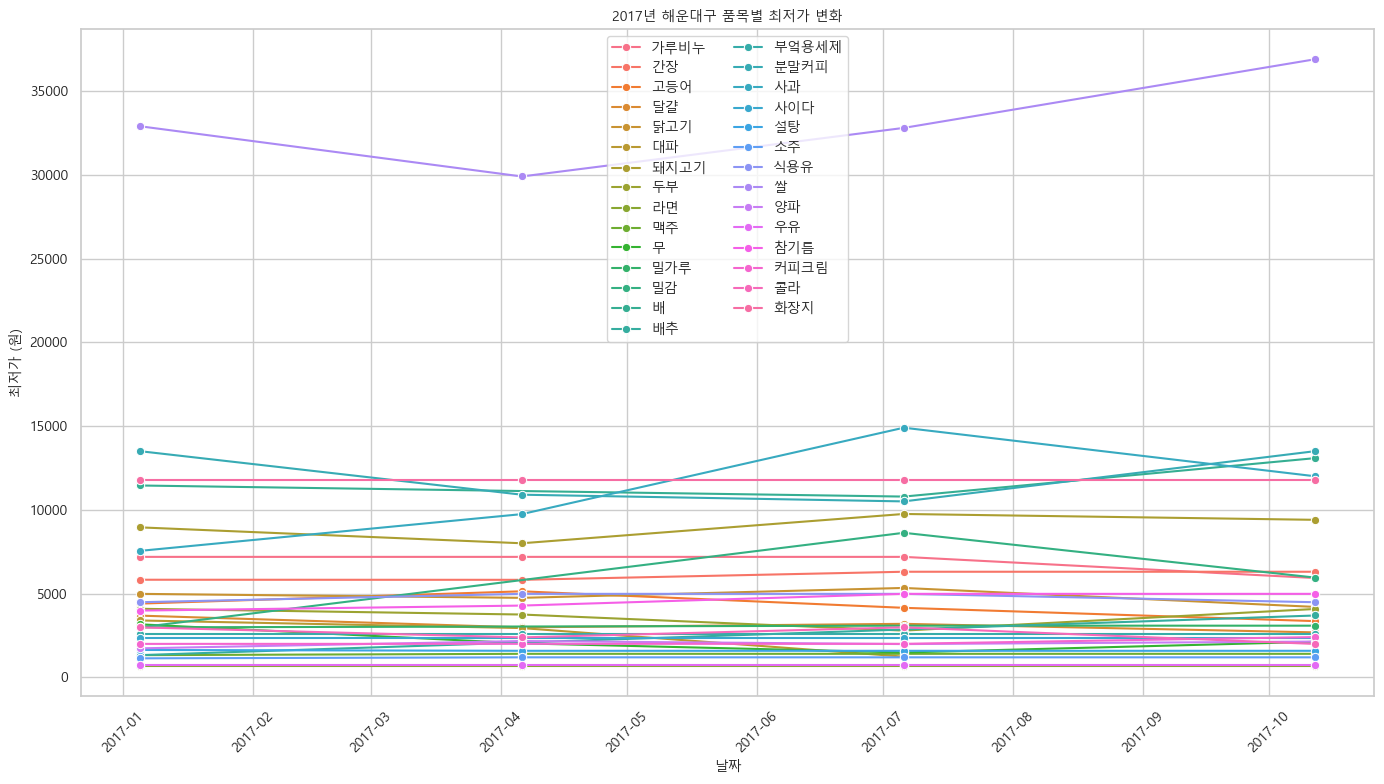

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# 📌 강제로 폰트 지정
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV 파일 불러오기
q1 = pd.read_csv("해운대구2017_1q.csv")
q2 = pd.read_csv("해운대구2017_2q.csv")
q3 = pd.read_csv("해운대구2017_3q.csv")
q4 = pd.read_csv("해운대구2017_4q.csv")

# 하나로 합치기
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["날짜"] = pd.to_datetime(df_all["날짜"])

# 시각화
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# 선그래프
sns.lineplot(data=df_all, x="날짜", y="최저가", hue="품목", marker="o")

# 그래프 꾸미기 (여기서 FontProperties 적용!)
plt.title("2017년 해운대구 품목별 최저가 변화", fontsize=16, fontproperties=font_prop)
plt.xlabel("날짜", fontproperties=font_prop)
plt.ylabel("최저가 (원)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()


# df_all을 저장하는 코드
df_all.to_csv("해운대구2017_min.csv", index=False, encoding="utf-8-sig")

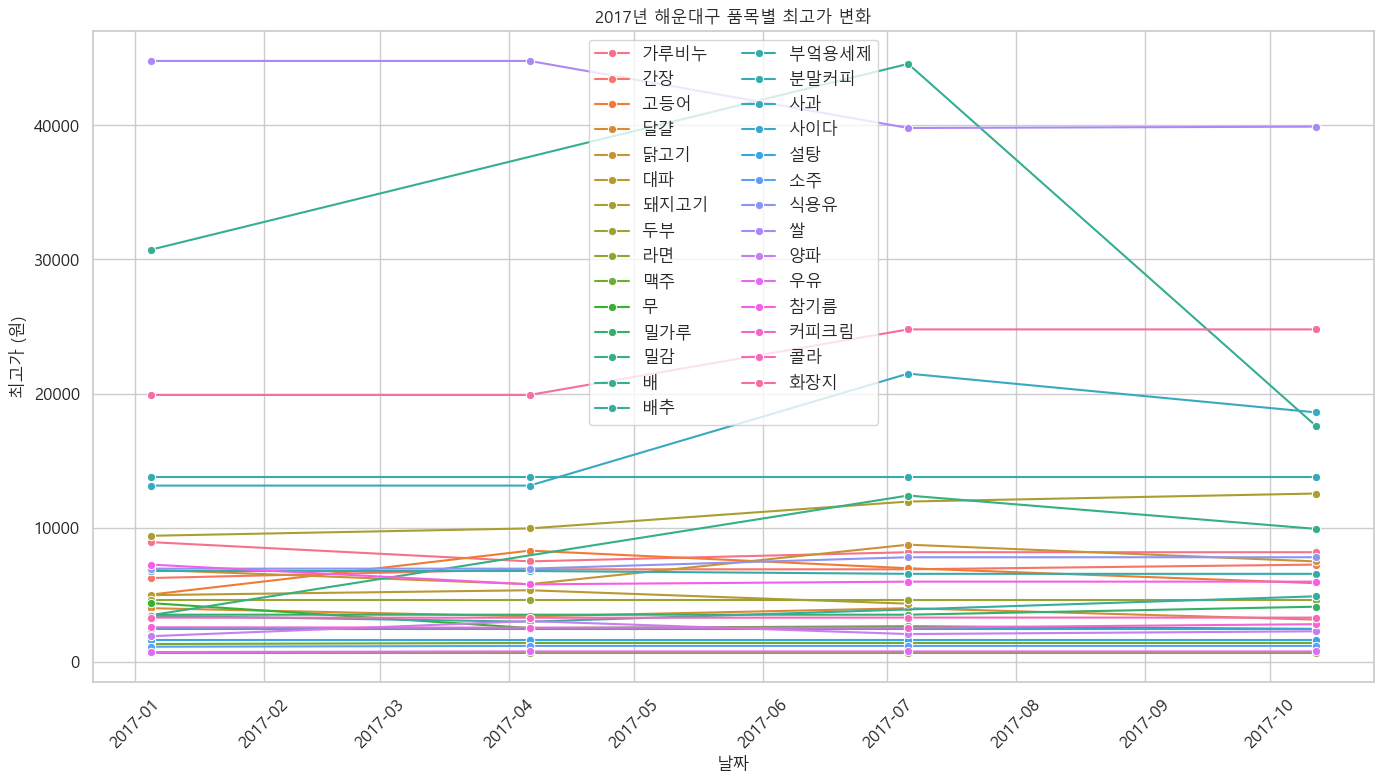

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# 📌 강제로 폰트 지정
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV 파일 불러오기
q1 = pd.read_csv("해운대구2017_1q.csv")
q2 = pd.read_csv("해운대구2017_2q.csv")
q3 = pd.read_csv("해운대구2017_3q.csv")
q4 = pd.read_csv("해운대구2017_4q.csv")

# 하나로 합치기
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["날짜"] = pd.to_datetime(df_all["날짜"])

# 시각화
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# 선그래프
sns.lineplot(data=df_all, x="날짜", y="최고가", hue="품목", marker="o")

# 그래프 꾸미기 (여기서 FontProperties 적용!)
plt.title("2017년 해운대구 품목별 최고가 변화", fontsize=16, fontproperties=font_prop)
plt.xlabel("날짜", fontproperties=font_prop)
plt.ylabel("최고가 (원)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()

# df_all을 저장하는 코드
df_all.to_csv("해운대구2017_max.csv", index=False, encoding="utf-8-sig")